In [1]:
import pandas as p

In [2]:
data = p.read_csv('titanic.csv', index_col='PassengerId')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
numData = ['Pclass','Age','SibSp','Parch','Fare']

In [9]:
ordinal = ['Sex']

In [10]:
oneHot = ['Embarked']

In [404]:
data.loc[data["Age"]<18]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S


In [405]:
targets = data.groupby('Survived').size()/len(data)
print(targets)

Survived
0    0.616162
1    0.383838
dtype: float64


In [406]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [407]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [408]:
data.loc[(data['Name'].str.contains("Miss")) & (data['Age'].notnull())]['Age'].mean()

21.773972602739725

In [409]:
"Sex" in data.columns.values

True

Mr. 32.33 Mrs. 35.9 Miss 21.8

In [431]:
def GetXY(data):
    data.loc[(data['Name'].str.contains("Mr. ")) & (data['Age'].isnull()),'Age'] = 32.33
    data.loc[(data['Name'].str.contains("Mrs.")) & (data['Age'].isnull()),'Age'] = 35.9
    data.loc[(data['Name'].str.contains("Miss")) & (data['Age'].isnull()),'Age'] = 21.8
    data.loc[(data['Name'].str.contains("Master.")) & (data['Age'].isnull()),'Age'] = 32.33
    data.loc[(data['Name'].str.contains("Dr.")) & (data['Age'].isnull()),'Age'] = 32.33
    #data['hasCabinNumber'] = data['Cabin'].notnull()
    data['intSex'] = data['Sex'].map({'female' : 0, 'male' : 1})
    #data['intEmbarked'] = data['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2, float('nan') : 3})
    if("Survived" in data.columns.values):
        return (data.drop(["Survived","Name","Sex","Ticket","Cabin","Embarked","Parch","SibSp"], axis="columns"), data['Survived'])
    else:
        return (data.drop(["Name","Sex","Ticket","Cabin","Embarked","Parch", "SibSp"], axis="columns"), None)

In [432]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,intSex
Survived,1.000000,-0.338481,-0.086748,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.338481,1.000000,-0.337510,0.083081,0.018443,-0.549500,0.131900
Age,-0.086748,-0.337510,1.000000,-0.246045,-0.187766,0.091697,0.124357
SibSp,-0.035322,0.083081,-0.246045,1.000000,0.414838,0.159651,-0.114631
Parch,0.081629,0.018443,-0.187766,0.414838,1.000000,0.216225,-0.245489
Fare,0.257307,-0.549500,0.091697,0.159651,0.216225,1.000000,-0.182333
intSex,-0.543351,0.131900,0.124357,-0.114631,-0.245489,-0.182333,1.000000


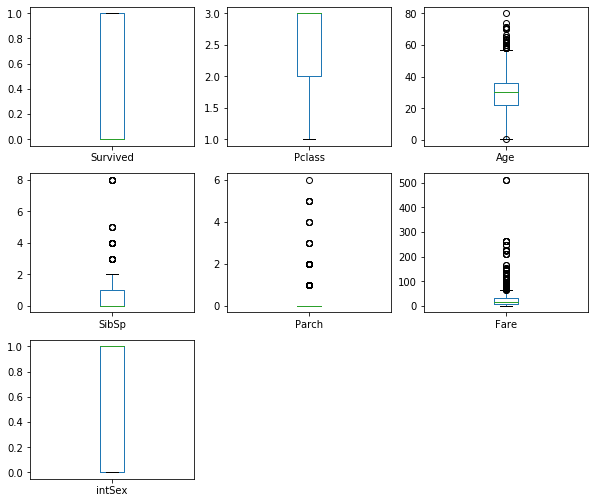

In [417]:
import matplotlib.pyplot as plt
%matplotlib inline 
data.plot(kind='box', subplots=True, layout=(8,3), figsize=(10, 24), 
          sharex=False, sharey=False)
plt.show()

In [448]:
X, y = GetXY(data)

In [449]:
X

,Pclass,Age,Fare,intSex
PassengerId,,,,
1,3,22.0,7.2500,1
2,1,38.0,71.2833,0
3,3,26.0,7.9250,0
4,1,35.0,53.1000,0
5,3,35.0,8.0500,1
...,...,...,...,...
887,2,27.0,13.0000,1
888,1,19.0,30.0000,0
889,3,21.8,23.4500,0


In [450]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [451]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [452]:
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [453]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [454]:
clfrs = []
clfrs.append(('PC', Perceptron(max_iter=1000, tol=1e-3)))
clfrs.append(('LR', LogisticRegression(multi_class='auto',solver='liblinear')))
#clfrs.append(('KNN', KNeighborsClassifier()))
clfrs.append(('DT', DecisionTreeClassifier(max_depth=10)))
clfrs.append(('NB', GaussianNB()))
clfrs.append(('RF', RandomForestClassifier(n_estimators=10)))
clfrs.append(('AB', AdaBoostClassifier(n_estimators=10)))

In [455]:
total_results = {}
for algName, clfr in clfrs:
    kfold = KFold(n_splits=10, random_state=5)
    results = cross_val_score(clfr, X_train_scaled, y_train, cv=kfold)
    total_results[algName] = results
    print('{} mean:{}'.format(algName, results.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is Fal

PC mean:0.6699530516431926
LR mean:0.7794014084507042
DT mean:0.7891823161189359
NB mean:0.7696400625978091
RF mean:0.8144953051643193


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AB mean:0.7878129890453834


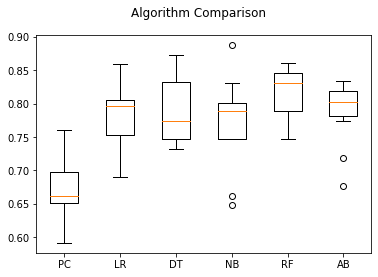

In [456]:
vals = total_results.values()
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(vals)
ax.set_xticklabels(total_results.keys())
plt.show()

In [504]:
import sklearn
base = RandomForestClassifier(n_estimators=100)
grid = {'n_estimators': [15,17, 20, 23, 25] }
model = sklearn.model_selection.RandomizedSearchCV(base, grid, cv=10)
model.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [505]:
model.best_params_

{'n_estimators': 25}

In [506]:
y_pred = model.predict(X_test_scaled)

In [507]:
metrics.precision_score(y_pred, y_test)

0.7794117647058824

In [508]:
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train_scaled, y_train)
fe = p.DataFrame({"fe" : model.feature_importances_, "col" : X.columns})

In [509]:
fe.sort_values(by="fe",ascending=False)

,fe,col
2,0.326677,Fare
1,0.287090,Age
3,0.284621,intSex
0,0.101612,Pclass


In [510]:
datatest = p.read_csv('titanic_test.csv', index_col='PassengerId')

In [512]:
model = RandomForestClassifier(n_estimators=25)

In [513]:
model.fit(X, y)
Xt, yt = GetXY(datatest)
y_pred = model.predict(Xt.fillna(0))

In [514]:
Xt.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [515]:
res = p.DataFrame({"PassengerId": Xt.index, "Survived" : y_pred})

In [516]:
res.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [517]:
res.to_csv("titanic_res.csv", index = False)